# Mengambil dataset dari Yahoo Finance untuk dataset PT Aneka Tambang tbk

In [1]:
import yfinance as yf

In [2]:
stock = yf.Ticker('ANTM.JK')
data = stock.history(period='3y')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-23 00:00:00+07:00,2233.326581,2329.289833,2198.430853,2207.154785,244871700,0.0,0.0
2022-05-24 00:00:00+07:00,2224.602673,2268.222333,2207.154809,2242.050537,110538500,0.0,0.0
2022-05-25 00:00:00+07:00,2233.326556,2250.774420,2146.087238,2172.259033,115849600,0.0,0.0
2022-05-27 00:00:00+07:00,2189.706760,2207.154623,2146.087104,2154.811035,76174000,0.0,0.0
2022-05-30 00:00:00+07:00,2180.983067,2242.050592,2154.811270,2233.326660,125203400,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-19 00:00:00+07:00,2670.000000,2730.000000,2640.000000,2720.000000,210292700,0.0,0.0
2025-05-20 00:00:00+07:00,2720.000000,2740.000000,2660.000000,2730.000000,163229300,0.0,0.0
2025-05-21 00:00:00+07:00,2780.000000,2920.000000,2770.000000,2910.000000,329772300,0.0,0.0


In [3]:
data.shape

(721, 7)

# Import Library

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Analisis Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 721 entries, 2022-05-23 00:00:00+07:00 to 2025-05-23 00:00:00+07:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          721 non-null    float64
 1   High          721 non-null    float64
 2   Low           721 non-null    float64
 3   Close         721 non-null    float64
 4   Volume        721 non-null    int64  
 5   Dividends     721 non-null    float64
 6   Stock Splits  721 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 45.1 KB


In [6]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,721.000000,721.000000,721.000000,721.000000,7.210000e+02,721.000000,721.0
mean,1660.099616,1684.119672,1634.620359,1656.380672,7.670221e+07,0.341622,0.0
std,247.763390,254.946462,243.100250,250.972860,7.103106e+07,5.790212,0.0
min,1200.000000,1225.000000,1175.000000,1210.000000,1.095400e+07,0.000000,0.0
25%,1490.024209,1513.089518,1475.000000,1490.000000,3.532940e+07,0.000000,0.0
50%,1630.000000,1652.620022,1600.738035,1625.000000,5.527580e+07,0.000000,0.0
75%,1798.830472,1822.165731,1781.107829,1798.830322,9.357120e+07,0.000000,0.0
max,2990.000000,3130.000000,2970.000000,3130.000000,7.640703e+08,128.071200,0.0


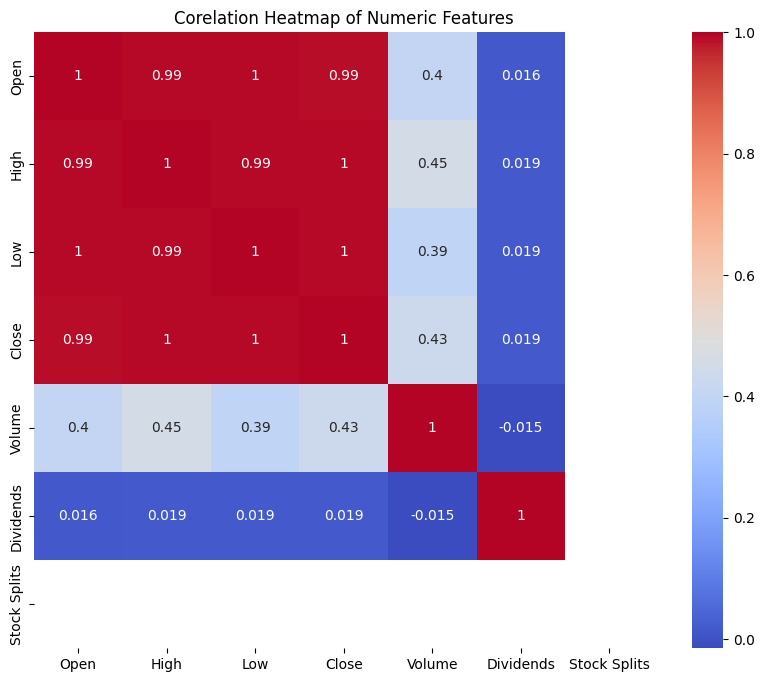

In [7]:
import seaborn as sns
numeric_df = data.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title ('Corelation Heatmap of Numeric Features')
    plt.show()
else:
    print('Tidak cukup kolom untuk membuat korelasi heatmap')

In [8]:
data.drop(['Dividends','Stock Splits'], axis=1, inplace=True)
data

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-23 00:00:00+07:00,2233.326581,2329.289833,2198.430853,2207.154785,244871700
2022-05-24 00:00:00+07:00,2224.602673,2268.222333,2207.154809,2242.050537,110538500
2022-05-25 00:00:00+07:00,2233.326556,2250.774420,2146.087238,2172.259033,115849600
2022-05-27 00:00:00+07:00,2189.706760,2207.154623,2146.087104,2154.811035,76174000
2022-05-30 00:00:00+07:00,2180.983067,2242.050592,2154.811270,2233.326660,125203400
...,...,...,...,...,...
2025-05-19 00:00:00+07:00,2670.000000,2730.000000,2640.000000,2720.000000,210292700
2025-05-20 00:00:00+07:00,2720.000000,2740.000000,2660.000000,2730.000000,163229300
2025-05-21 00:00:00+07:00,2780.000000,2920.000000,2770.000000,2910.000000,329772300


In [9]:
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                       
---  ------  --------------  -----                       
 0   Date    721 non-null    datetime64[ns, Asia/Jakarta]
 1   Open    721 non-null    float64                     
 2   High    721 non-null    float64                     
 3   Low     721 non-null    float64                     
 4   Close   721 non-null    float64                     
 5   Volume  721 non-null    int64                       
dtypes: datetime64[ns, Asia/Jakarta](1), float64(4), int64(1)
memory usage: 33.9 KB


In [11]:
invalid_dates = data['Date'].isnull().sum()
print(f'Number of invalid dates: {invalid_dates}')

if invalid_dates > 0:
    data = data.dropna(subset=['Date'])
    print('Dropped rows with invalid dates')

display(data.head())

Number of invalid dates: 0


,Date,Open,High,Low,Close,Volume
0,2022-05-23 00:00:00+07:00,2233.326581,2329.289833,2198.430853,2207.154785,244871700
1,2022-05-24 00:00:00+07:00,2224.602673,2268.222333,2207.154809,2242.050537,110538500
2,2022-05-25 00:00:00+07:00,2233.326556,2250.774420,2146.087238,2172.259033,115849600
3,2022-05-27 00:00:00+07:00,2189.706760,2207.154623,2146.087104,2154.811035,76174000
4,2022-05-30 00:00:00+07:00,2180.983067,2242.050592,2154.811270,2233.326660,125203400


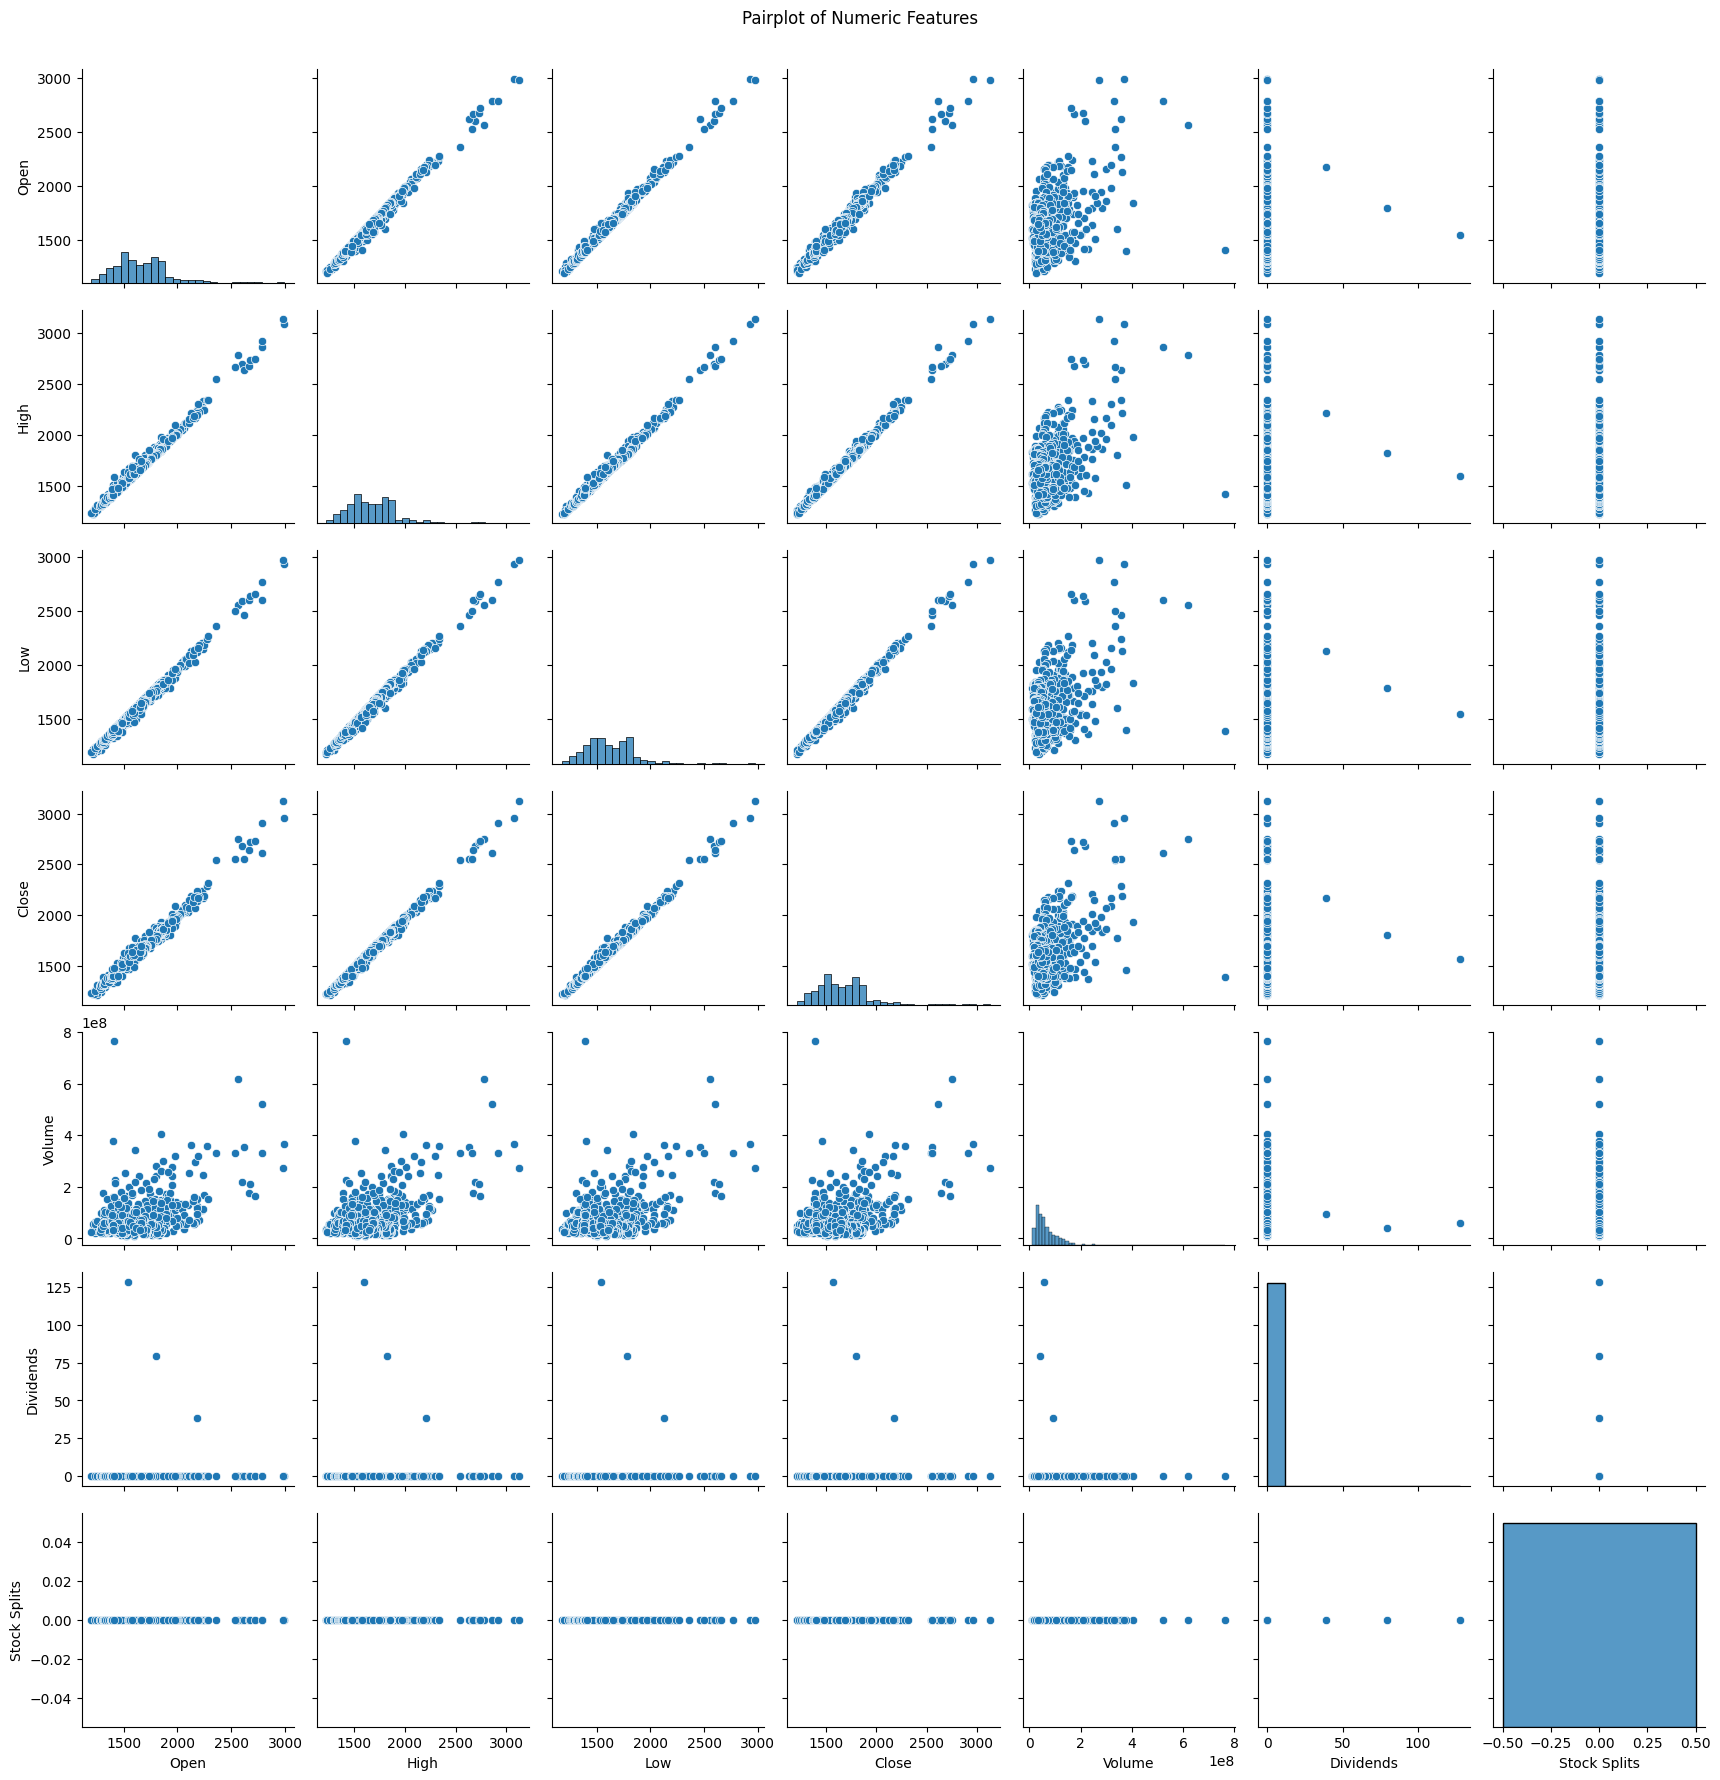

In [12]:
if numeric_df.shape[1] >1:
    sns.pairplot(numeric_df)
    plt.suptitle('Pairplot of Numeric Features', y=1.02)
    plt.show()

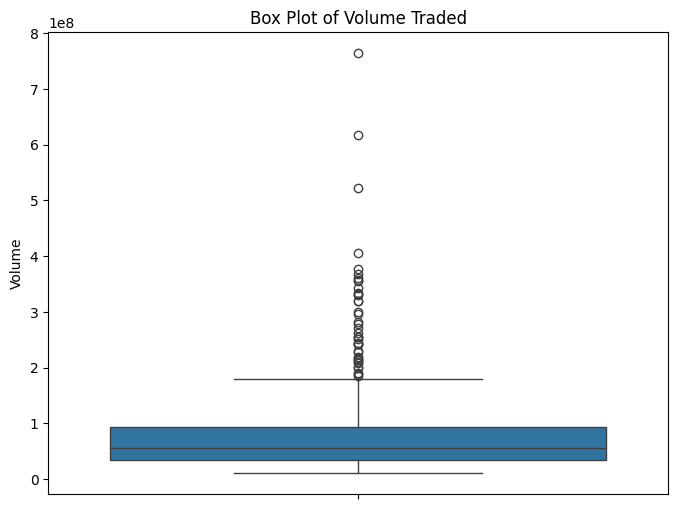

<ipython-input-13-9bca6a690df3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Close', data=avg_prices, palette='viridis')


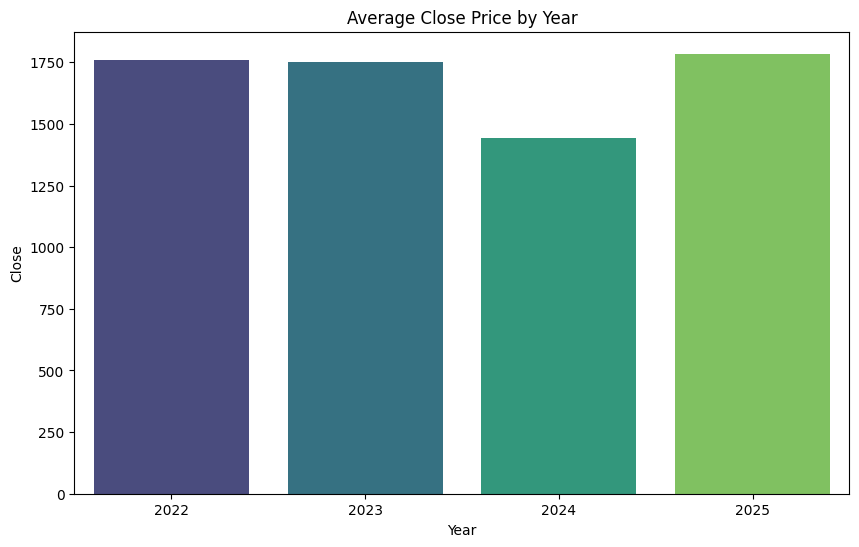

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(y=data['Volume'])
plt.title ('Box Plot of Volume Traded')
plt.show()

data['Year'] = data['Date'].dt.year
avg_prices = data.groupby('Year')[['Open', 'Close', 'High', 'Low']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Close', data=avg_prices, palette='viridis')
plt.title('Average Close Price by Year')
plt.show()

# Preprocessing

In [14]:
def prepare_train_df(data_series, data_input=6):
    X, y = [], []

    for i in range(len(data_series) - data_input):
        X.append(data_series[i:i + data_input].flatten())  # Gunakan flatten/ravel
        y.append(data_series[i + data_input][0])  # Ambil angka scalar

    X_df = pd.DataFrame(X, columns=[f'x{i+1}' for i in range(data_input)])
    y_df = pd.Series(y, name='y')

    train_df = pd.concat([X_df, y_df], axis=1)
    return train_df

data_series = data['Close'].values.reshape(-1, 1)

# Normalisasi
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_series)

train_df = prepare_train_df(data_scaled, data_input=6)
train_df

,x1,x2,x3,x4,x5,x6,y
0,0.519351,0.537526,0.501177,0.492089,0.532983,0.510264,0.510264
1,0.537526,0.501177,0.492089,0.532983,0.510264,0.510264,0.505720
2,0.501177,0.492089,0.532983,0.510264,0.510264,0.505720,0.500522
3,0.492089,0.532983,0.510264,0.510264,0.505720,0.500522,0.486676
4,0.532983,0.510264,0.510264,0.505720,0.500522,0.486676,0.486676
...,...,...,...,...,...,...,...
710,0.802083,0.729167,0.765625,0.697917,0.697917,0.744792,0.786458
711,0.729167,0.765625,0.697917,0.697917,0.744792,0.786458,0.791667
712,0.765625,0.697917,0.697917,0.744792,0.786458,0.791667,0.885417
713,0.697917,0.697917,0.744792,0.786458,0.791667,0.885417,0.911458


In [15]:
#Memisahkan fitur (X) dan target (y)
X = train_df.drop(columns='y').values
y = train_df['y'].values

In [16]:
# Reshape X menjadi (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [17]:
# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modeling

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Definisikan model yang lebih kompleks
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(6, 1)))  # Lapisan LSTM pertama dengan lebih banyak unit
model.add(Dropout(0.3))  # Dropout untuk mencegah overfitting
model.add(LSTM(50, return_sequences=False))  # Lapisan LSTM kedua
model.add(Dropout(0.3))  # Dropout kedua
model.add(Dense(25, activation='relu'))  # Lapisan Dense tambahan dengan aktivasi ReLU
model.add(Dense(1))  # Output layer
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,  # Lebih sabar untuk hasil yang lebih baik
    restore_best_weights=True,
    verbose=1
)

# Callback ReduceLROnPlateau untuk mengurangi learning rate jika tidak ada perbaikan
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # Kurangi learning rate menjadi 20% dari sebelumnya
    patience=5,  # Tunggu 5 epoch sebelum mengurangi
    min_lr=0.00001,  # Batas minimum learning rate
    verbose=1
)

# Latih model dengan early stopping dan reduce learning rate
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # Tambah jumlah epoch
    batch_size=32,  # Ubah batch size untuk stabilitas pelatihan
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0432 - val_loss: 0.0150 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0064 - val_loss: 0.0119 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0033 - val_loss: 0.0073 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0022 - val_loss: 0.0045 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0018 - val_loss: 0.0042 - learning_rate: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0020 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0018 - val_loss: 0.0049 - learning_rate: 0.0010
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0019 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0019 - val_loss: 0.0045 - learning_rate: 0.0010
Epoch 10/1

# Evaluasi Model

In [19]:
# Evaluasi model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Hitung RMSE untuk data train dan test
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Tampilkan ringkasan model
model.summary()

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Train RMSE: 0.035989713608900444
Test RMSE: 0.06510171142093855


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,905 (847.29 KB)

 Trainable params: 72,301 (282.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 144,604 (564.86 KB)

In [23]:
from sklearn.metrics import mean_absolute_percentage_error
# Pastikan data dalam skala asli (inverse transform)
y_train_rescaled = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
train_predictions_rescaled = scaler.inverse_transform(train_predictions).flatten()
test_predictions_rescaled = scaler.inverse_transform(test_predictions).flatten()
# Hitung MAPE
train_mape = mean_absolute_percentage_error(y_train_rescaled, train_predictions_rescaled) * 100
test_mape = mean_absolute_percentage_error(y_test_rescaled, test_predictions_rescaled) * 100
print(f"Train MAPE: {train_mape:.3f}%")
print(f"Test MAPE: {test_mape:.3f}%")

Train MAPE: 3.418%
Test MAPE: 4.794%


# Visualisasi Grafik Harga Actual dan Prediksi

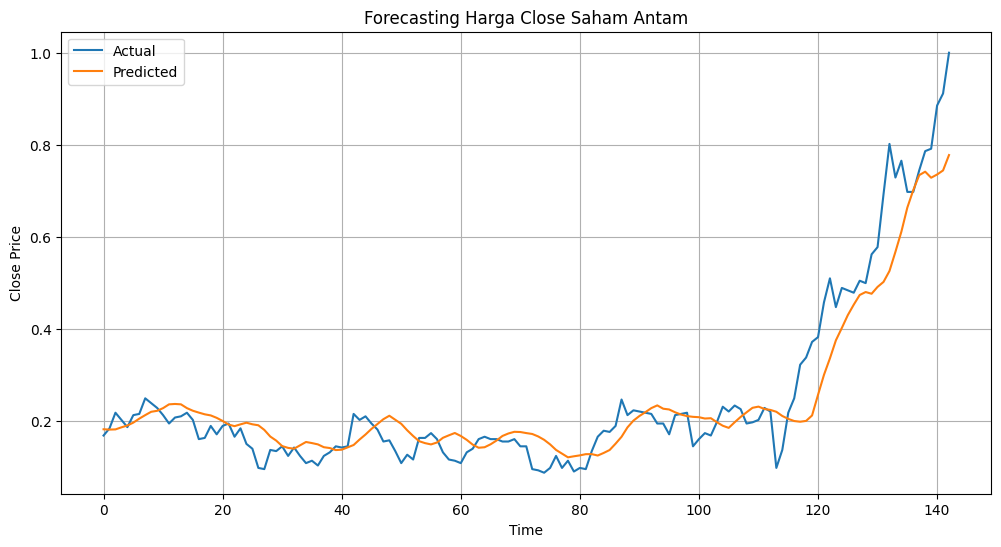

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title("Forecasting Harga Close Saham Antam")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Forecasting Untuk 30 hari kedepan

In [21]:
# Forecasting 30 hari ke depan
data_input = 6
last_sequence = data_scaled[-data_input:]  # Ambil 6 hari terakhir
forecast = []
future_dates = pd.date_range(start='2025-05-23', periods=30, freq='D')  # Mulai dari 23 Mei 2025

for _ in range(30):
    # Ubah bentuk yang benar untuk prediksi (jumlah sampel, jumlah timestep, jumlah fitur)
    last_sequence_reshaped = last_sequence.reshape((1, data_input, 1)) # Ubah bentuk untuk prediksi, dengan asumsi 1 fitur

    next_pred = model.predict(last_sequence_reshaped, verbose=0)  # Prediksi
    forecast.append(next_pred[0, 0])  # Simpan prediksi

    # Perbarui urutan untuk iterasi berikutnya
    next_sequence = last_sequence[1:]  # Geser jendela
    next_sequence = np.vstack((next_sequence, np.array([[next_pred[0, 0]]])))  # Append the new prediction as a new step in the sequence
    last_sequence = next_sequence
# Ubah kembali ke nilai asli (Inverse transform)
forecast = np.array(forecast).reshape(-1, 1)

forecast_rescaled = scaler.inverse_transform(forecast)# Ubah kembali harga Close yang diprediksi ke skala asli

# Buat DataFrame untuk hasil
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': forecast_rescaled.flatten() # Flatten the results to a 1D array
})

print(forecast_df)

         Date  Predicted_Close
0  2025-05-23      2792.680908
1  2025-05-24      2855.285156
2  2025-05-25      2897.879395
3  2025-05-26      2936.594971
4  2025-05-27      2935.739258
5  2025-05-28      2924.506592
6  2025-05-29      2877.294434
7  2025-05-30      2903.484131
8  2025-05-31      2915.262695
9  2025-06-01      2917.527588
10 2025-06-02      2911.468018
11 2025-06-03      2905.773926
12 2025-06-04      2902.578369
13 2025-06-05      2909.473389
14 2025-06-06      2910.486816
15 2025-06-07      2908.912598
16 2025-06-08      2906.862793
17 2025-06-09      2906.113037
18 2025-06-10      2906.534424
19 2025-06-11      2907.561523
20 2025-06-12      2907.027100
21 2025-06-13      2906.239258
22 2025-06-14      2905.754639
23 2025-06-15      2905.661621
24 2025-06-16      2905.670410
25 2025-06-17      2905.529541
26 2025-06-18      2905.114990
27 2025-06-19      2904.768555
28 2025-06-20      2904.541016
29 2025-06-21      2904.362549


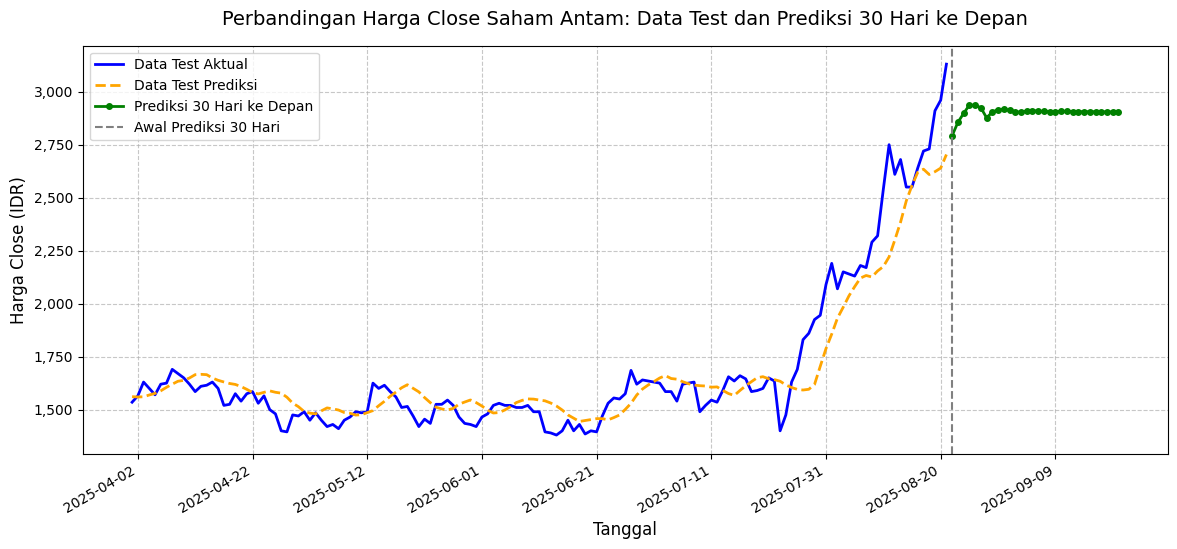

In [22]:


# Pastikan y_test dan test_predictions sudah dalam skala asli
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
test_predictions_rescaled = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()

# Asumsikan y_test adalah bagian dari data historis, kita perlu tanggal untuk sumbu x
test_dates = pd.date_range(start='2025-04-01', periods=len(y_test), freq='D')  # Sesuaikan start date

# Tanggal untuk forecast sudah ada di forecast_df
forecast_dates = forecast_df['Date']
forecast_values = forecast_df['Predicted_Close']

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(test_dates, y_test_rescaled, label='Data Test Aktual', color='blue', linewidth=2)
plt.plot(test_dates, test_predictions_rescaled, label='Data Test Prediksi', color='orange', linestyle='--', linewidth=2)

# Plot forecast 30 hari ke depan, dimulai dari akhir prediksi test
forecast_start_date = test_dates[-1] + pd.Timedelta(days=1)  # Mulai dari hari setelah data test
extended_dates = pd.date_range(start=forecast_start_date, periods=30, freq='D')

# Plot forecast 30 hari ke depan
plt.plot(extended_dates, forecast_values, label='Prediksi 30 Hari ke Depan', color='green', linestyle='-', linewidth=2, marker='o', markersize=4)
plt.axvline(x=forecast_start_date, color='gray', linestyle='--', label='Awal Prediksi 30 Hari')
plt.title("Perbandingan Harga Close Saham Antam: Data Test dan Prediksi 30 Hari ke Depan", fontsize=14, pad=15)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga Close (IDR)", fontsize=12)

# Format sumbu x (tanggal)
plt.gcf().autofmt_xdate()  # Rotasi tanggal agar lebih mudah dibaca
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Batasi jumlah tick pada sumbu x

# Format sumbu y (harga)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format harga dengan pemisah ribuan
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()